In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import json
import os
import seaborn as sns
from numpy import median
import numpy as np
%matplotlib inline

## RESULTS USING THE SIGNAL OF TRUNCATE

In [2]:
env='Walker2d-v4'
df_comper = pd.DataFrame()
for i in range(1,6):
  path ='COMPER_DDPG/data_using_truncate/'+env+'/train/trial'+str(i)+'/progress.json'
  aux = pd.read_json(path,lines=True)    
  df_comper = pd.concat([df_comper,aux])
df_comper["Method"]="COMPER"
print(df_comper.shape)

(211615, 17)


In [3]:
df_ddpg = pd.DataFrame()
for i in range(1,6):
  path ='DPPG/data_using_truncate/'+env+'/train/trial'+str(i)+'/progress.json'
  aux = pd.read_json(path,lines=True)    
  df_ddpg = pd.concat([df_ddpg,aux])
df_ddpg["Method"]="DDPG"
print(df_ddpg.shape)

(236186, 17)


In [4]:
df_comper.head()

,Trial,LogCount,Task,Time,TotalItr,TMCount,RTMCount,e,Ep,EpItr,Done,EpRew,AvgEp,Avg100Ep,AvgLast50Ep,AvgLast10Ep,Method
0,1,1,Walker2d-v4,25-07-2023 12:54:27,50,0,50,0.002485,1,51,True,-3.673218,-3.673218,-3.673218,-3.673218,-3.673218,COMPER
1,1,2,Walker2d-v4,25-07-2023 12:54:30,51,0,51,0.002535,1,52,True,-4.635257,-4.154237,-4.154237,-4.154237,-4.154237,COMPER
2,1,3,Walker2d-v4,25-07-2023 12:54:33,52,0,52,0.002585,1,53,True,-5.053428,-4.453968,-4.453968,-4.453968,-4.453968,COMPER
3,1,4,Walker2d-v4,25-07-2023 12:54:36,53,0,53,0.002634,1,54,True,-4.363319,-4.431305,-4.431305,-4.431305,-4.431305,COMPER
4,1,5,Walker2d-v4,25-07-2023 12:54:39,54,0,54,0.002684,1,55,True,-1.985724,-3.942189,-3.942189,-3.942189,-3.942189,COMPER


In [5]:
df_ddpg.head()

,Trial,LogCount,Task,Time,TotalItr,TMCount,RTMCount,e,Ep,EpItr,Done,EpRew,AvgEp,Avg100Ep,AvgLast50Ep,AvgLast10Ep,Method
0,1,1,Walker2d-v4,20-07-2023 00:48:06,83,84,0,0.004125,1,84,True,31.167440,31.167440,31.167440,31.167440,31.167440,DDPG
1,1,2,Walker2d-v4,20-07-2023 00:48:06,84,85,0,0.004175,1,85,True,31.226134,31.196787,31.196787,31.196787,31.196787,DDPG
2,1,3,Walker2d-v4,20-07-2023 00:48:06,85,86,0,0.004225,1,86,True,31.412292,31.268622,31.268622,31.268622,31.268622,DDPG
3,1,4,Walker2d-v4,20-07-2023 00:48:06,86,87,0,0.004275,1,87,True,31.807694,31.403390,31.403390,31.403390,31.403390,DDPG
4,1,5,Walker2d-v4,20-07-2023 00:48:06,87,88,0,0.004324,1,88,True,32.449491,31.612610,31.612610,31.612610,31.612610,DDPG


In [6]:
df=pd.concat([df_comper,df_ddpg])
df.head()

,Trial,LogCount,Task,Time,TotalItr,TMCount,RTMCount,e,Ep,EpItr,Done,EpRew,AvgEp,Avg100Ep,AvgLast50Ep,AvgLast10Ep,Method
0,1,1,Walker2d-v4,25-07-2023 12:54:27,50,0,50,0.002485,1,51,True,-3.673218,-3.673218,-3.673218,-3.673218,-3.673218,COMPER
1,1,2,Walker2d-v4,25-07-2023 12:54:30,51,0,51,0.002535,1,52,True,-4.635257,-4.154237,-4.154237,-4.154237,-4.154237,COMPER
2,1,3,Walker2d-v4,25-07-2023 12:54:33,52,0,52,0.002585,1,53,True,-5.053428,-4.453968,-4.453968,-4.453968,-4.453968,COMPER
3,1,4,Walker2d-v4,25-07-2023 12:54:36,53,0,53,0.002634,1,54,True,-4.363319,-4.431305,-4.431305,-4.431305,-4.431305,COMPER
4,1,5,Walker2d-v4,25-07-2023 12:54:39,54,0,54,0.002684,1,55,True,-1.985724,-3.942189,-3.942189,-3.942189,-3.942189,COMPER


In [7]:
df.tail()

,Trial,LogCount,Task,Time,TotalItr,TMCount,RTMCount,e,Ep,EpItr,Done,EpRew,AvgEp,Avg100Ep,AvgLast50Ep,AvgLast10Ep,Method
44581,5,44582,Walker2d-v4,20-07-2023 08:22:07,49996,49041,0,0.999,50,997,True,1008.059262,549.445284,958.835639,983.746268,1003.562948,DDPG
44582,5,44583,Walker2d-v4,20-07-2023 08:22:08,49997,49042,0,0.999,50,998,True,1009.061246,549.455594,959.831012,984.737613,1004.561876,DDPG
44583,5,44584,Walker2d-v4,20-07-2023 08:22:08,49998,49043,0,0.999,50,999,True,1010.063706,549.465925,960.826549,985.729156,1005.561510,DDPG
44584,5,44585,Walker2d-v4,20-07-2023 08:22:08,49999,49044,0,0.999,50,1000,True,1011.065471,549.476278,961.822244,986.720909,1006.561611,DDPG
44585,5,44586,Walker2d-v4,20-07-2023 08:22:08,50000,49045,0,0.999,50,1001,True,1012.064939,549.486653,962.818071,987.712846,1007.561745,DDPG


<Axes: xlabel='TotalItr', ylabel='AvgLast10Ep'>

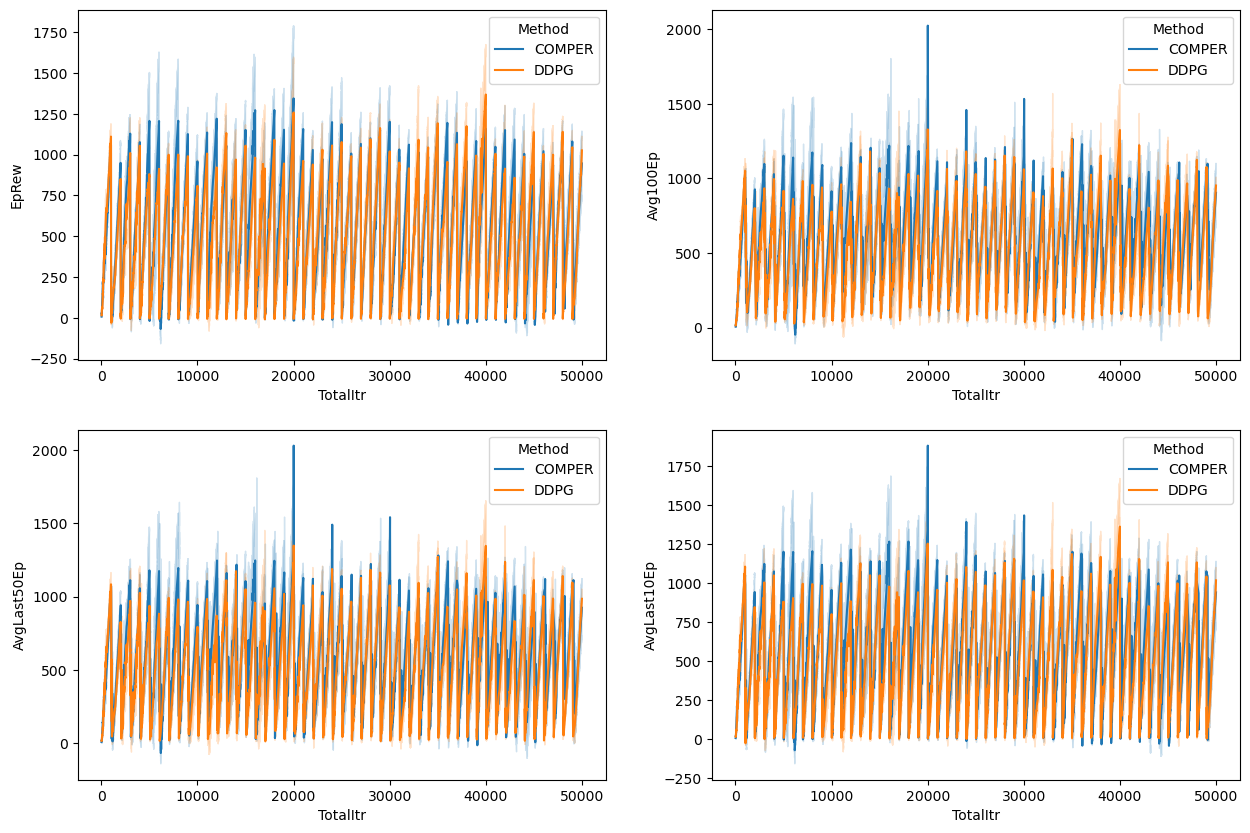

In [8]:
fig, axs = plt.subplots(nrows=2,ncols=2)
fig.set_figwidth(15)
fig.set_figheight(10)
sns.lineplot(data=df, x="TotalItr", y="EpRew",hue='Method',ax=axs[0][0])
sns.lineplot(data=df, x="TotalItr", y="Avg100Ep",hue="Method",ax=axs[0][1])
sns.lineplot(data=df, x="TotalItr", y="AvgLast50Ep",hue="Method",ax=axs[1][0])
sns.lineplot(data=df, x="TotalItr", y="AvgLast10Ep",hue="Method",ax=axs[1][1])

In [9]:
path ='COMPER_DDPG/data/'+env+'/eval/progress.json'
df_comper_eval = pd.read_json(path,lines=True)
df_comper_eval["Method"]="COMPER"
print(df_comper_eval.shape)
df_comper_eval.head()

(50, 6)


,Trial,Time,Task,Int,EvalAvgRew,Method
0,1,25-07-2023 17:17:37,Walker2d-v4,5000,5.658840,COMPER
1,1,25-07-2023 21:56:20,Walker2d-v4,10000,6.155324,COMPER
2,1,26-07-2023 02:33:05,Walker2d-v4,15000,6.192832,COMPER
3,1,26-07-2023 07:01:41,Walker2d-v4,20000,3.553240,COMPER
4,1,26-07-2023 11:31:24,Walker2d-v4,25000,5.213922,COMPER


In [10]:
path ='DPPG/data/'+env+'/eval/progress.json'
df_ddpg_eval = pd.read_json(path,lines=True)
df_ddpg_eval["Method"]="DDPG"
print(df_ddpg_eval.shape)
df_ddpg_eval.head()

(50, 6)


,Trial,Time,Task,Int,EvalAvgRew,Method
0,1,20-07-2023 00:55:46,Walker2d-v4,5000,1.059690,DDPG
1,1,20-07-2023 01:03:41,Walker2d-v4,10000,2.544492,DDPG
2,1,20-07-2023 01:11:57,Walker2d-v4,15000,0.538726,DDPG
3,1,20-07-2023 01:20:27,Walker2d-v4,20000,1.109204,DDPG
4,1,20-07-2023 01:29:20,Walker2d-v4,25000,5.543812,DDPG


In [11]:
df_ddpg_eval.describe()

,Trial,Int,EvalAvgRew
count,50.000000,50.000000,50.000000
mean,3.000000,27500.000000,-0.569003
std,1.428571,14507.211437,2.975788
min,1.000000,5000.000000,-5.475960
25%,2.000000,15000.000000,-2.620270
50%,3.000000,27500.000000,-1.699703
75%,4.000000,40000.000000,1.048915
max,5.000000,50000.000000,6.209625


In [12]:
df_eval=pd.concat([df_comper_eval,df_ddpg_eval])
df_eval.rename(columns = {'Int':'Itr'}, inplace = True)

<Axes: xlabel='Itr', ylabel='EvalAvgRew'>

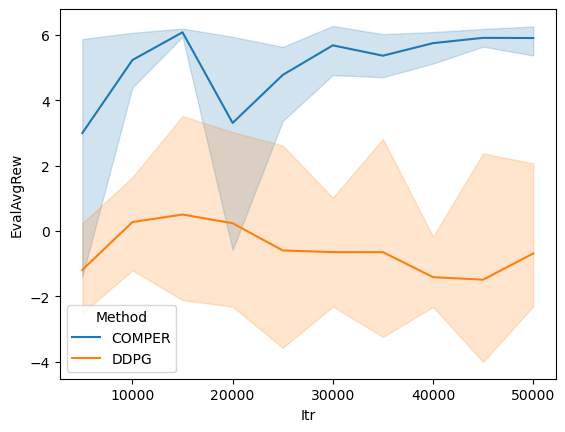

In [13]:
sns.lineplot(data=df_eval, x="Itr", y="EvalAvgRew",hue='Method')

## USING ROLLING AVERAGE

In [14]:
df_comper_rolling_avg = pd.DataFrame(df_comper[["TotalItr","EpRew","Method"]])
df_comper_rolling_avg["EpRewRolling"]=df_comper_rolling_avg['EpRew'].rolling(100).mean()
df_comper_rolling_avg.dropna(inplace=True)
df_comper_rolling_avg.head()

,TotalItr,EpRew,Method,EpRewRolling
99,149,166.795124,COMPER,95.299548
100,150,167.996730,COMPER,97.016247
101,151,169.187010,COMPER,98.754470
102,152,170.366155,COMPER,100.508666
103,153,171.534204,COMPER,102.267641


In [15]:
df_ddpg_rolling_avg=pd.DataFrame(df_ddpg[["TotalItr","EpRew","Method"]])
df_ddpg_rolling_avg["EpRewRolling"]=df_ddpg_rolling_avg["EpRew"].rolling(100).mean()
df_ddpg_rolling_avg.dropna(inplace=True)
df_ddpg_rolling_avg.head()

,TotalItr,EpRew,Method,EpRewRolling
99,234,227.421336,DDPG,128.308962
100,235,229.222905,DDPG,130.289517
101,236,230.976458,DDPG,132.287020
102,237,232.864619,DDPG,134.301544
103,238,234.174679,DDPG,136.325213


In [16]:
df_rolling=pd.concat([df_comper_rolling_avg,df_ddpg_rolling_avg])
df_rolling.head()

,TotalItr,EpRew,Method,EpRewRolling
99,149,166.795124,COMPER,95.299548
100,150,167.996730,COMPER,97.016247
101,151,169.187010,COMPER,98.754470
102,152,170.366155,COMPER,100.508666
103,153,171.534204,COMPER,102.267641


In [17]:
df_rolling.tail()

,TotalItr,EpRew,Method,EpRewRolling
44581,49996,1008.059262,DDPG,958.835639
44582,49997,1009.061246,DDPG,959.831012
44583,49998,1010.063706,DDPG,960.826549
44584,49999,1011.065471,DDPG,961.822244
44585,50000,1012.064939,DDPG,962.818071


<Axes: xlabel='TotalItr', ylabel='EpRewRolling'>

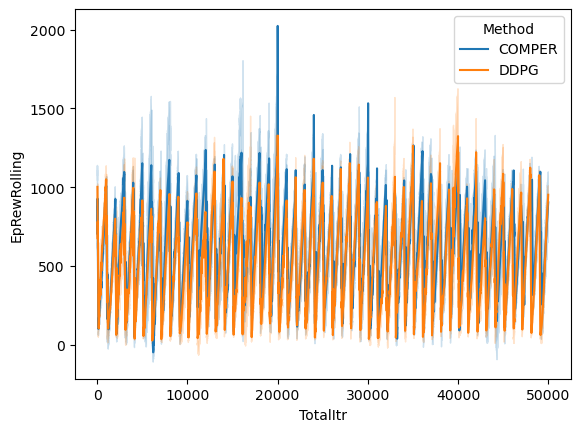

In [18]:
fig = plt.Figure()
fig.set_figwidth(15)
fig.set_figheight(10)
sns.lineplot(data=df_rolling, x="TotalItr", y="EpRewRolling",hue='Method')

In [19]:
df_comper_eval_rolling_avg = pd.DataFrame(df_comper_eval[["Int","EvalAvgRew","Method"]])
df_comper_eval_rolling_avg["EpRewRolling"]=df_comper_eval["EvalAvgRew"].rolling(2).mean()
df_comper_eval_rolling_avg.dropna(inplace=True)
df_comper_eval_rolling_avg.head()

,Int,EvalAvgRew,Method,EpRewRolling
1,10000,6.155324,COMPER,5.907082
2,15000,6.192832,COMPER,6.174078
3,20000,3.553240,COMPER,4.873036
4,25000,5.213922,COMPER,4.383581
5,30000,6.149561,COMPER,5.681742


In [20]:
df_ddpg_eval_rolling_avg = pd.DataFrame(df_ddpg_eval[["Int","EvalAvgRew","Method"]])
df_ddpg_eval_rolling_avg["EpRewRolling"]=df_ddpg_eval["EvalAvgRew"].rolling(2).mean()
df_ddpg_eval_rolling_avg.dropna(inplace=True)
df_ddpg_eval_rolling_avg.head()

,Int,EvalAvgRew,Method,EpRewRolling
1,10000,2.544492,DDPG,1.802091
2,15000,0.538726,DDPG,1.541609
3,20000,1.109204,DDPG,0.823965
4,25000,5.543812,DDPG,3.326508
5,30000,-2.329887,DDPG,1.606962


<Axes: xlabel='Int', ylabel='EpRewRolling'>

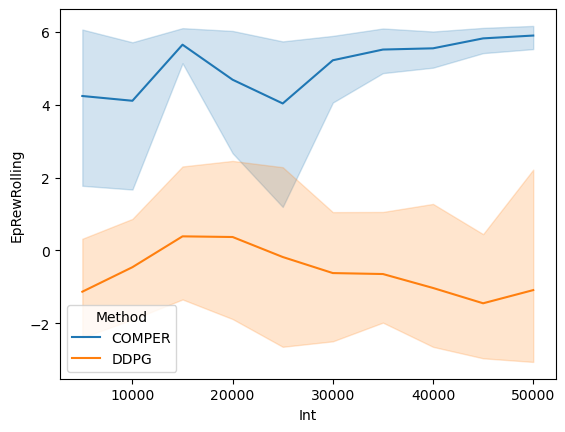

In [21]:
df_eval_rolling=pd.concat([df_comper_eval_rolling_avg,df_ddpg_eval_rolling_avg])
sns.lineplot(data=df_eval_rolling, x="Int", y="EpRewRolling",hue='Method')